# 深層学習の基礎 - 1
参考：  
* [Udemy講座：「①米国AI開発者がやさしく教える深層学習超入門第一弾【Pythonで実践】」](https://www.udemy.com/course/deeplearning1/learn/lecture/40143418)
* https://axa.biopapyrus.jp/deep-learning/
* [パーセプトロン](https://axa.biopapyrus.jp/deep-learning/perceptron.html)
* [ニューラルネットワークの基礎](https://tutorials.chainer.org/ja/13_Basics_of_Neural_Networks.html)

## 深層学習とは
深層学習は機械学習のアルゴリズムの一種である。  
従来の機械学習手法（ロジスティック回帰やGBDTなど）は人が特徴量を作ってモデルに渡して学習させていたため、  
良い特徴量をいかに作るかが重要であった。  
一方、深層学習では入力データをモデルに渡すとモデル自身が特徴量を作って学習するため、  
良い特徴量を作ってくれるモデルをいかに作るかが重要という点で従来の機械学習手法と異なる。  
深層学習ではニューラルネットワーク(NN)という人間の神経を模したモデルを用いてデータを学習する。  
このNNの層を深くしていくことで精度が高いモデル構築することが出来る。  

深層学習の適用例は下記。  
昨今の生成AIも深層学習の応用であり、社会に非常に大きな影響を与えている技術の一つ。
* 音声認識
* 医用画像診断
* 顔認証
* 株価予想
* 画像生成

## 深層学習の文脈でよく使われる記号・表記
同様の意味でも統計学や深層学習以外の機械学習モデルで使用していた記号と深層学習で用いる記号は異なる。  
(ドキュメントや論文によって表記は異なる。)

### 例）線形回帰のモデル式
$\hat{y}=\hat{f}(x)=\theta_0 + \theta_1x$　→ $z = w_1x + b$  

機械学習における線形回帰の式のような線形変換（正しくはアフィン変換）の出力は、  
深層学習においては$z$などで表わす。  
機械学習では特徴量$x$に対する重みに相当する量は$\theta$で表すことが多かったが、  
深層学習ではそのまま$weight$の$w$を用いて表す。またbias項は$b$で表わす。  

### 例）シグモイド関数
$z=\frac{1}{1+e^{-x}}$  →  $\sigma(x)=\frac{1}{1+e^{-x}}$  

詳細は後述するが、この$\sigma(x)$はニューラルネットワーク（NN）における”活性化関数”で良く用いられる表記である。  

### 例）ロジスティック回帰の式
$p(x)=\frac{1}{1+e^{-(\theta_0 + \theta_1)}}$  →  $p(x)=a=\sigma(z)=\sigma(w_1x + b)=\frac{1}{1+e^{-(w_1x + b)}}$  

活性化関数からの出力は$a$で表わすことが多い。  

### 例）softmax関数の式
$p_k(\hat{\bm{y}})=\frac{e^{\hat{y}_k}}{\sum_{k=1}^K e^{\hat{y}_k}}$  →  $\sigma(\bm{z})_j=\frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$

* $\hat{y}_k, e^{z_j}, e^{z_k}$にはkまたはj番目のクラス（赤など）を真の値として学習した線形回帰モデルの出力が入る。  
$\hat{\bm{y}}, \bm{z}$はクラスごとに値を持つベクトルであることに注意。  
例）$\bm{z}=(z_1, z_2, z_3)$


## Pytorch
深層学習ライブラリとしてはよくPytorchが用いられる。  
Tensorflowも一時期使われていたが、最近はPytorchが主流。  
深層学習に使用するデータはPytorchのTensorモジュールで取り扱う。

### - 計算グラフ
Pytorchではtensor同士の計算を行った際に”計算グラフ”(Computational Graph)というものを構築し、保持しておく機能がある。  
計算グラフは演算の計算過程のようなもので、計算グラフを用いることで任意の関数の勾配を容易に求めることが出来る。  
また、可視化することで人間にも視覚的に理解しやすい。詳細は講義資料参照。  
深層学習において、損失関数は重み$w_i$や重みによって決まる値を変数とする多変数関数だとみなし、  
これらの連鎖律（チェインルール）によって損失関数の勾配($\partial L/ \partial w_i$)を求める際に計算グラフを用いている。

参考：
https://manabitimes.jp/math/1303

## ミニバッチ勾配降下法（ミニバッチ学習）
深層学習ではメモリに乗り切らないような大規模データを学習させることが多い。  
そのため、基本的にすべての学習データを一気に学習させるのではなく、  
いくつかのデータを一つの塊（ミニバッチ）にして学習させていく。  
これを __ミニバッチ勾配降下法__ という。  

ミニバッチのサイズ（いくつのデータを塊とするか）は自由に選択できるが、GPUのメモリに乗る最大の$2^n$のバッチサイズを選ぶことが多い。  
ミニバッチサイズが1の場合は __確率的勾配降下法(SGD: Stochastic Gradient Descent)__ といい、全データの場合は __バッチ勾配降下法__ という。  
これらはミニバッチ勾配降下法の特別な場合といえる。（ミニバッチ勾配降下法をSGDと呼ぶこともあるので注意。）  
だが、下記のような難点があるので基本的にはミニバッチ勾配降下法で適切なデータサイズを検討することが主流。  

■ SGDとバッチ勾配降下法の難点：  
* SGD
    * 全データ数分の学習ループを回す必要があるので、学習に時間がかかる  
    ※一方、1データ分だけを変数に読み込むのでメモリ効率は良い
    * 損失が外れ値となるようなデータがある場合、パラメタが大きく更新されてしまい、収束から離れてしまうことがある  
    （最適化の際にノイズが入りやすい）  
    

* バッチ勾配降下法
    * 学習データが大きすぎるとメモリに乗り切らない
    * tensorなどの計算コストが高くなる
    * 全データから損失を算出するため、各データの損失を捉えきれず、収束しづらい(損失が小さくならない)  


※メモ  
* DL_notebook-3_Multinomial_Logistic_Regression.ipynbで実施したのはSGDに相当する
* ML_notebook-1(LinearRegression).ipynbの最急降下法は全データを使ったが、epoch数を大きくすることで収束させた

## ニューラルネットワーク(NN)
ニューラルネットワーク(NN)とは __微分可能な変換を繋げて作られた計算グラフ__ である。※  
深層学習の文脈では計算グラフにおける数値が入った○は __ノード(あるいはニューロン、ユニット)__ 、  
ノードの縦方向の集まりのことを __層(Layer)__ 、ノード同士をつなぐ線を __エッジ__ と呼ぶ。  
層には主に下記がある。  
* __入力層__ : 各データの特徴量が入力される層  
* __隠れ層__ : 受け取った入力に対して何らかの変換を行う層
    * この何らかの変換には __活性化関数(activation function)__ を用いる。
    * 隠れ層は増やせるので、ある隠れ層の出力を次の隠れ層が入力として受け取って何らかの変換を行うことが層の数だけ繰り返される。
* __出力層__ : モデルの最終的な出力を行う層。最後の隠れ層からの出力を受け取り、活性化関数で変換して出力する。

隠れ層は増やすことができ、層の数が非常に多いNNを用いた機械学習の手法を __ディープラーニング(deep learning)__ という。  
(特に層の数がいくら以上という定義はない模様)

※ニューラルネットワークはドキュメントによって色々な定義がされているが、最もピンときた説明を引用した。  
[ニューラルネットワークの基礎](https://tutorials.chainer.org/ja/13_Basics_of_Neural_Networks.html)

例）3層構造のニューラルネットワーク図示(1データ、3特徴量の場合)  
数式的な表現はMLPの箇所に記す。  
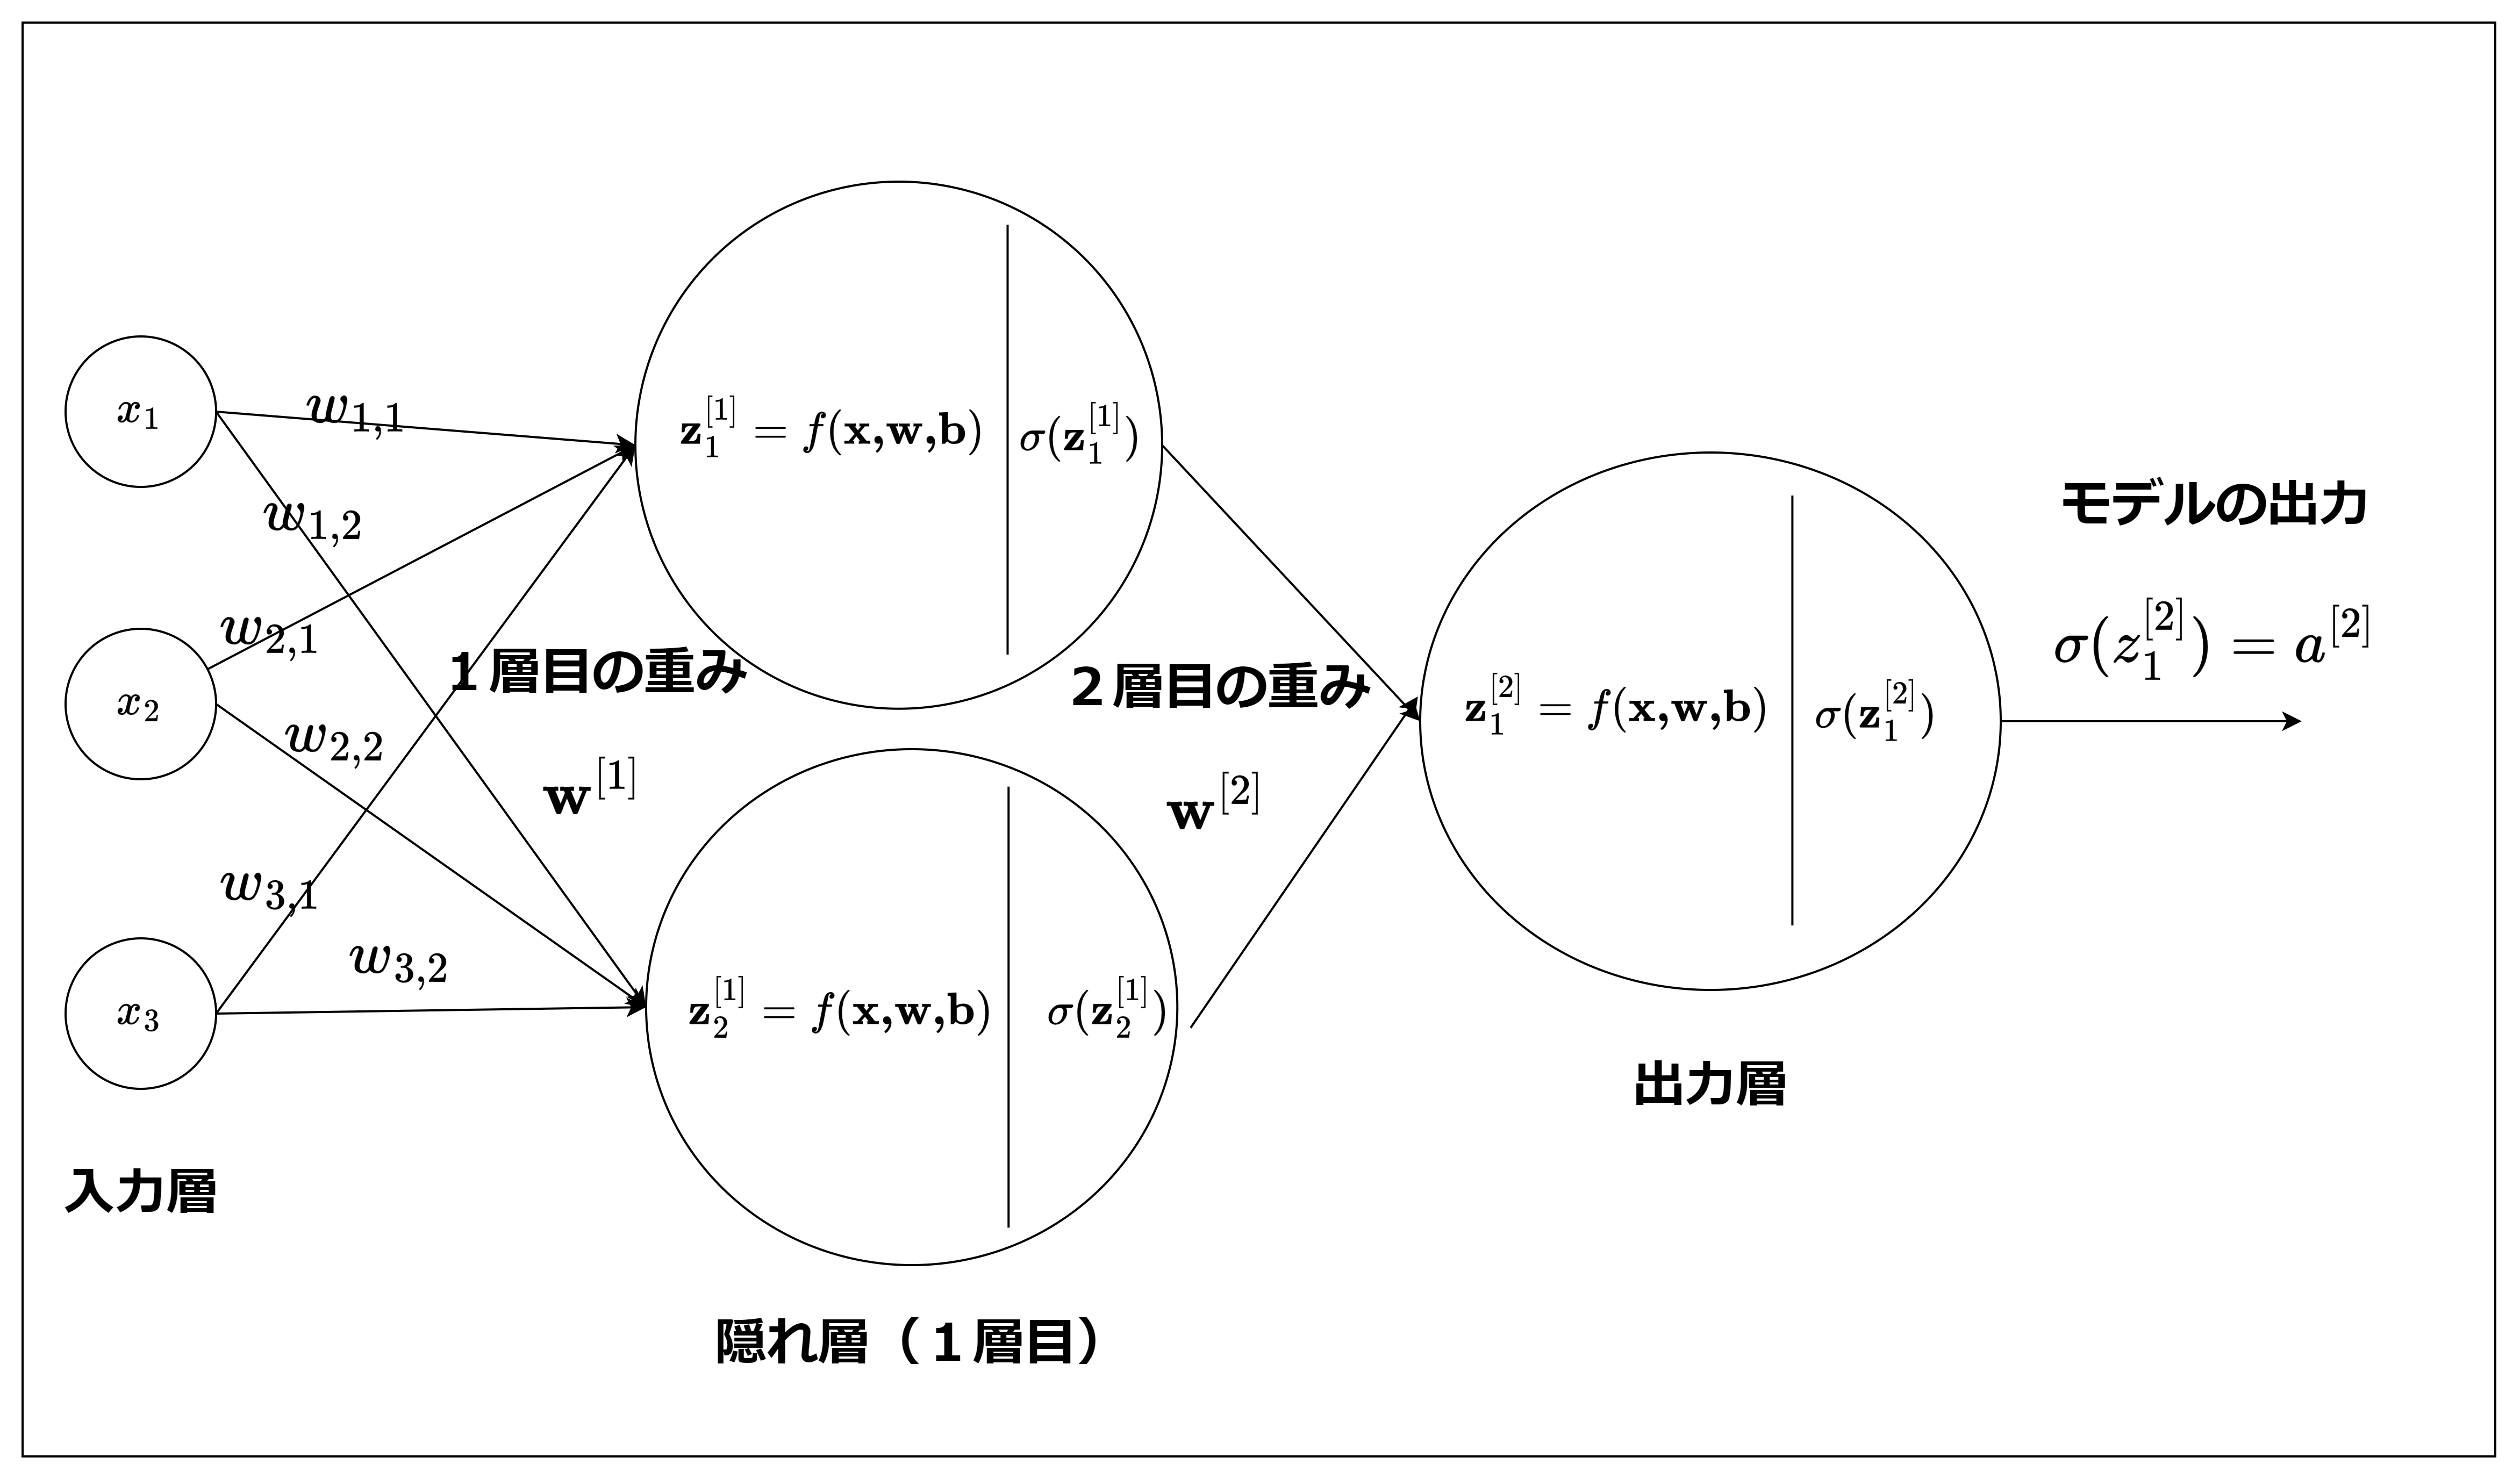

例）2クラス分類のロジスティック回帰(データ数1、特徴量数3)をNNで表現する  
$z=w_1x_1 + w_2x_2 + w_3x_3 + b$  
$p(x)=a=\sigma(z)$  

下図の左から入力層、隠れ層、出力層となっている。(この例では隠れ層が出力層を兼ねている。)   
まず入力層の各ノードに1データの特徴量が入り、エッジに重み$w$を書くことでそれぞれの積を表現する。    
重みと掛け合わされた結果$z$は隠れ層への入力となって隠れ層のノードの左側に書かれる。  
なお、バイアスは一番左の層（入力層）には書かず、2層目以降の各ノードの中で足し合わせ、表記する。  
隠れ層の右側ではその入力に対する変換を表記する。ここではシグモイド関数が適応され、$a$として最終的に出力される。  

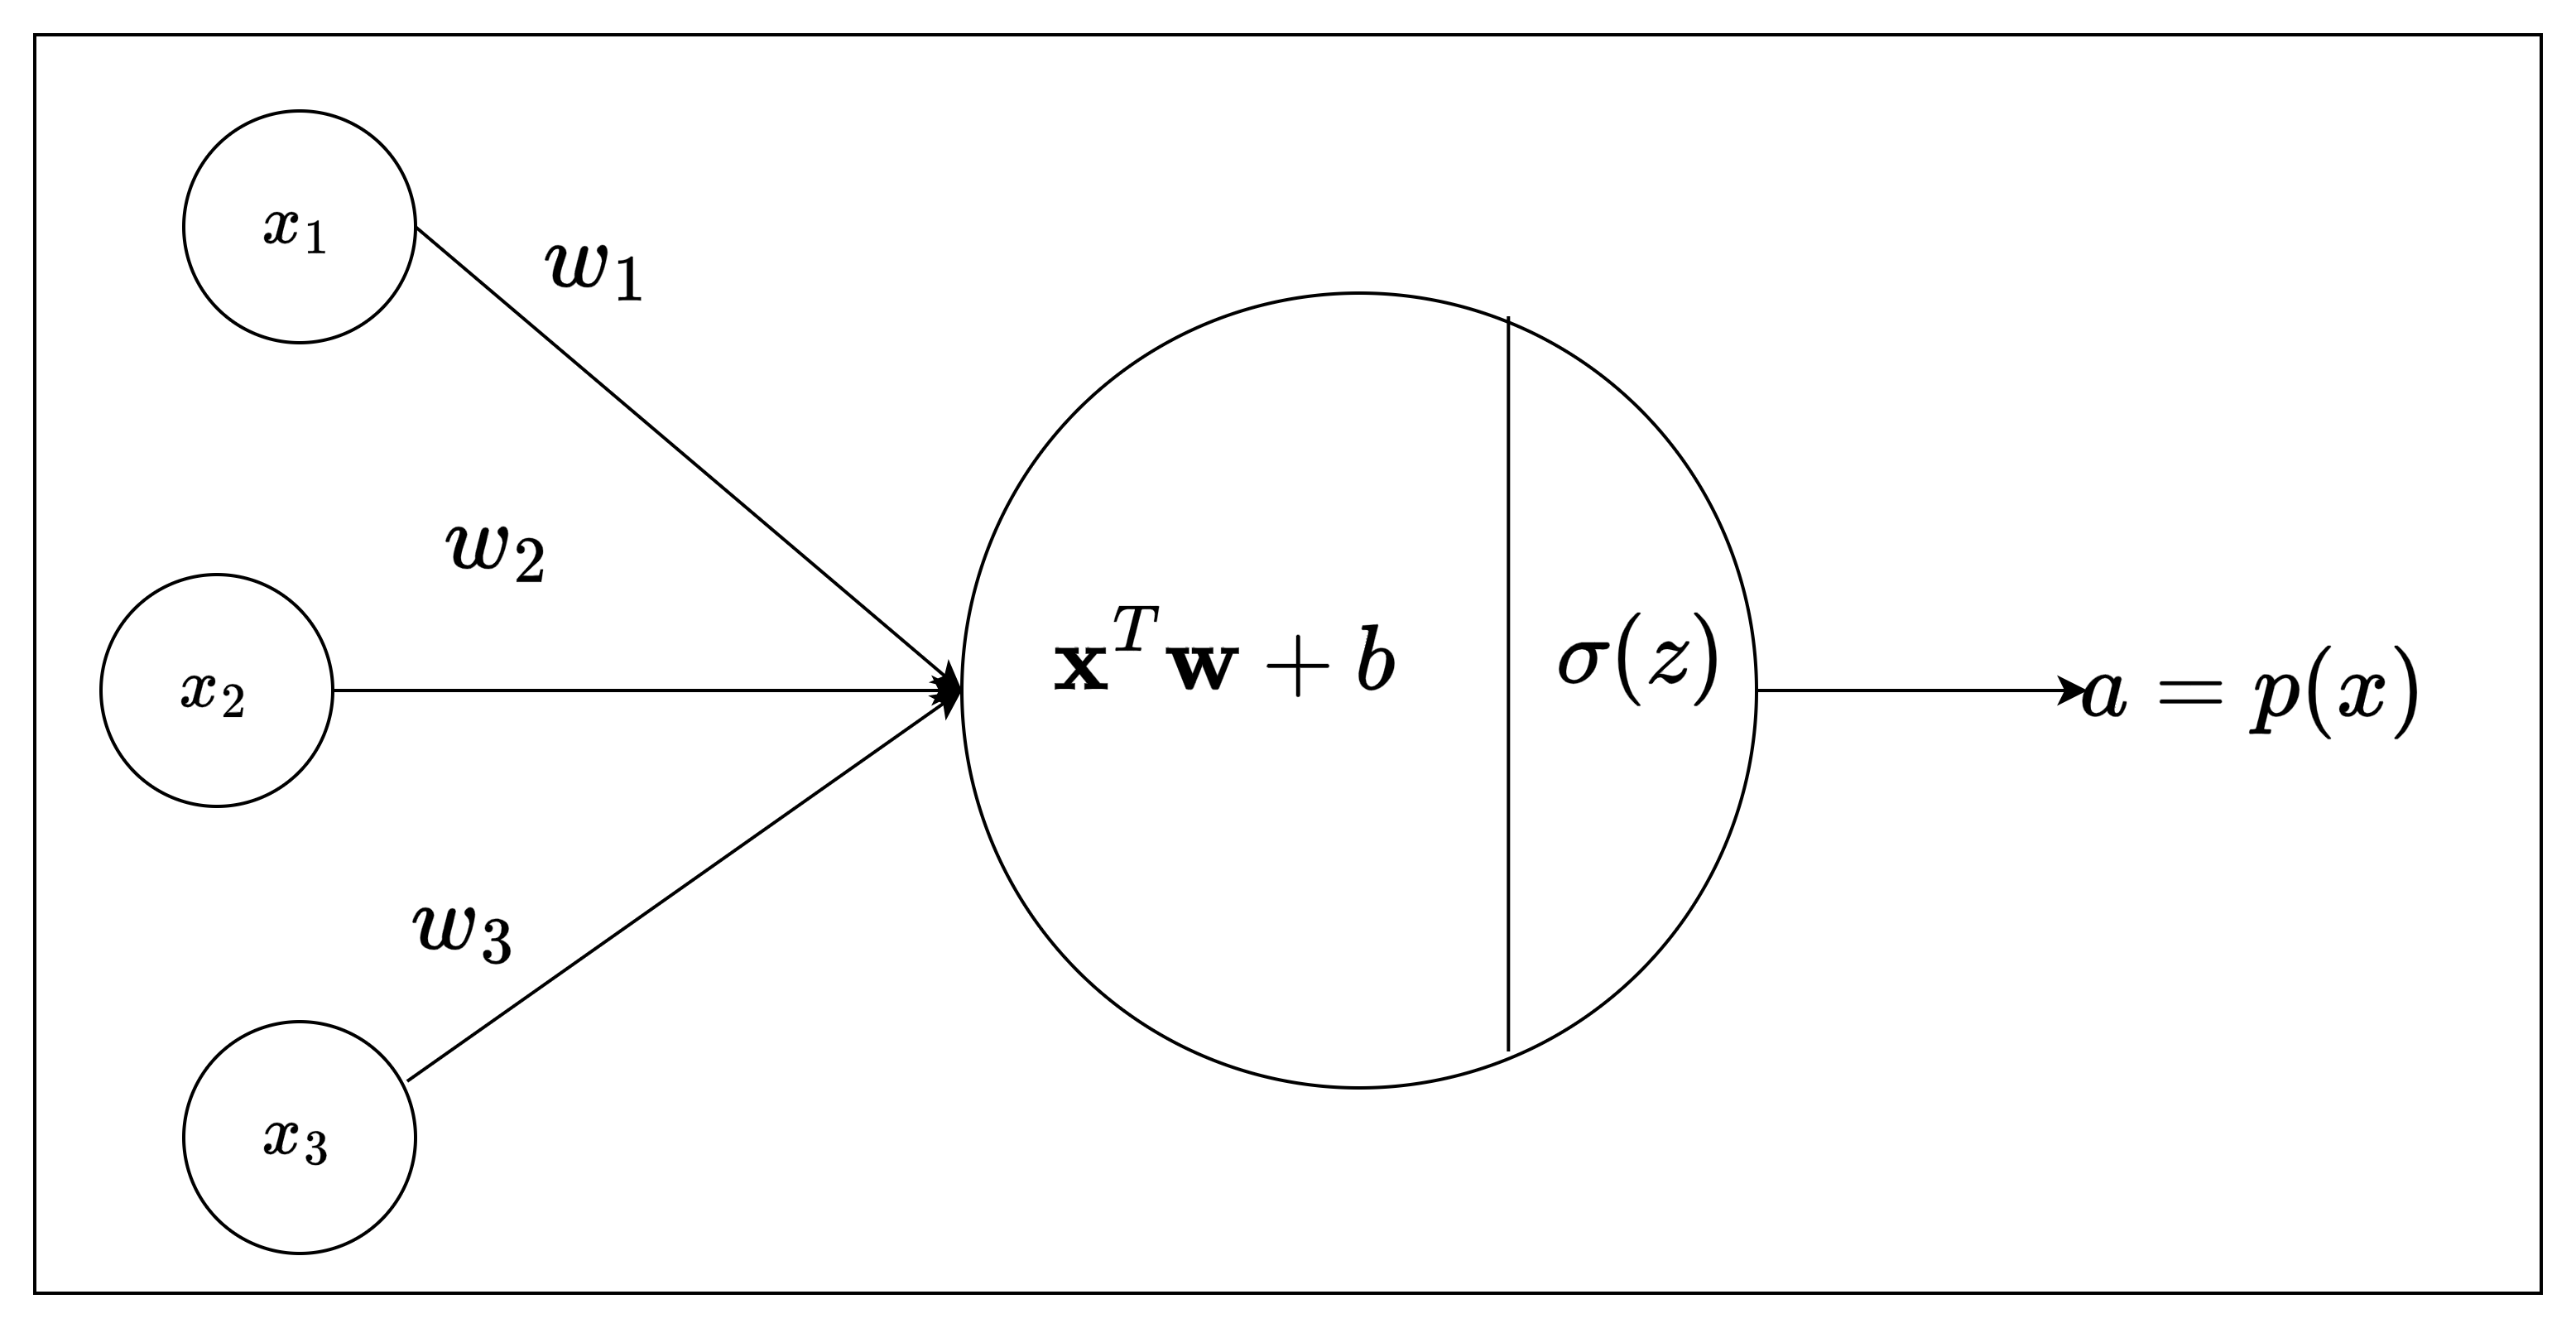

### 活性化関数
* 活性化関数には非線形関数を選択する。これは活性化関数が線形（例えば$\bm{Z}$を定数倍して返すような関数）だと、  
    結局一つの線形変換の形で表わされるので層を重ねる意味がなくなるため。  
* 隠れ層の活性化関数には __ReLU(Rectified Linear Unit)関数__  が用いられることが多い。  
ReLu関数は入力が０以下の時は０を出力し、０以上の時は入力をそのまま出力する関数である。  
$$\sigma{(z)}=max(0,z)$$  
* ReLUは$z$の値によって結果が０になり（=ニューロンが非アクティブになる）、アクティブのニューロンのみを計算すればよくなるため、  
計算効率の向上が期待できる。また、計算しないことで程よく学習しなくなるので過学習の防止も期待できる。  

## 多層パーセプトロン(MLP:Multi-Layer Perceptron)  
深層学習の基礎となるモデル。  
ニューラルネットワークにおいて1つの層に複数のノード（ニューロン）を持ち、さらにこれらの層が複数あるモデルを指す。  
隠れ層で線形結合を行うモデルの場合、  
基本的に入力層→重みをかけて線形結合→結果を隠れ層の活性化関数で変換→重みをかけて線形結合→結果を隠れ層の活性化関数で変換・・・の繰り返し。  
下記は隠れ層が１つの場合の表現だが、隠れ層が増えても考え方は同じ。  

### ■ 例）隠れ層の数が1の場合（入力層、隠れ層、出力層の3層構造の場合）  
データ数$m$, 特徴量数$nf$(number of features), 隠れ層のノード数$nh$とすると、  
隠れ層1の多層パーセプトロンは下記のように表せる。Pytorchでもこのように実装されているらしい。  
$\bm{X}$は入力データ、$\bm{Z}$は隠れ層または出力層への入力、$\bm{W}$は層間でエッジにかかる重み、$\bm{B}$は各層で足されるバイアス、  
$\bm{A}$は隠れ層または出力層において活性化関数を適用した後の出力を表す。    
右上の添え字は入力層以降の層番号を表す。下記の場合、[1]は隠れ層1層目、[2]は出力層。  
入力層は層の数にカウントしないことが多い。なので下記は”2層のMLP”と呼んだりする。  

#### 1. 入力層→隠れ層

$\bm{Z}^{[1]} = \bm{XW}^{[1]T}+\bm{B}^{[1]} $  
$=\left(
\begin{matrix} 
x_{1,1} & x_{1,2} & ... & x_{1,nf}\\ 
x_{2,1} & x_{2,2} & ... & x_{2, nf}\\
. & . & ... & .\\
x_{m,1} & x_{m,2} & ... & x_{m, nf}
\end{matrix} 
\right)$
$\left(
\begin{matrix} 
w_{1, 1}^{[1]} & w_{1, 2}^{[1]} & ... & w_{1, nh}^{[1]}\\ 
w_{2, 1}^{[1]} & w_{2, 2}^{[1]} & ... & w_{2, nh}^{[1]}\\
. & . & ... & .\\
w_{nf,1}^{[1]} & w_{nf,2}^{[1]} & ... & w_{nf, nh}^{[1]}
\end{matrix} 
\right)$
$+\left(
\begin{matrix} 
b_{1} & b_{2} & ... & b_{nh}\\ 
b_{1} & b_{2} & ... & b_{nh}\\
. & . & ... & .\\
b_{1} & b_{2} & ... & b_{nh}
\end{matrix}
\right)$  

$=\left(
\begin{matrix} 
\sum_{k=1}^{nf} x_{1, k}w_{k,  1}^{[1]}+b_1 & \sum_{k=1}^{nf} x_{1, k}w_{k,  2}^{[1]}+b_2 & ... & \sum_{k=1}^{nf} x_{1, k}w_{k, nh}^{[1]}+b_{nh}\\ 
\sum_{k=1}^{nf} x_{2, k}w_{k,  1}^{[1]}+b_1 & \sum_{k=1}^{nf} x_{2, k}w_{k,  2}^{[1]}+b_2 & ... & \sum_{k=1}^{nf} x_{2, k}w_{k, nh}^{[1]}+b_{nh}\\ 
. & . & ... & .\\
\sum_{k=1}^{nf} x_{m, k}w_{k,  1}^{[1]}+b_1 & \sum_{k=1}^{nf} x_{m, k}w_{k,  2}^{[1]}+b_2 & ... & \sum_{k=1}^{nf} x_{m, k}w_{k, nh}^{[1]}+b_{nh}\\ 
\end{matrix} 
\right)$

$=\left(
\begin{matrix} 
z_{1,1} & z_{1,2} & ... & z_{1,nh}\\ 
z_{2,1} & z_{2,2} & ... & z_{2,nh}\\
. & . & ... & .\\
z_{m,1} & z_{m,2} & ... & z_{m, nh}
\end{matrix} 
\right)$  

* ポイント
    * 入力データ$\bm{X}$のshapeの積（データ数$m$と特徴量数$nf$の積）は入力層のノード数に対応する。  
    * パラメタ$\bm{W}, \bm{B}$のshapeは下記である必要がある。
        * $\bm{W}$: 隠れ層のノード数 x 特徴量数　※実際は転置をとって$\bm{X}$と積をとることに注意
            * $\bm{W}$のshapeは __出力 x 入力__ と覚えておくとよい。（２層目以降でも通用する）  
        * $\bm{B}$: 1 x 隠れ層のノード数

#### 2. 隠れ層で活性化関数適用

$A^{[1]}=\sigma{(Z^{[1]})}=\left(
\begin{matrix} 
a_{1,1} & a_{1,2} & ... & a_{1,nh}\\ 
a_{2,1} & a_{2,2} & ... & a_{2,nh}\\
. & . & ... & .\\
a_{m,1} & a_{m,2} & ... & a_{m, nh}
\end{matrix} 
\right)$

* ポイント
    * 活性化関数にはReLU関数を用いることが多い
    * 隠れ層を重ねる場合でも活性化関数は各層で同じものを使うのが一般的。

#### 3. 隠れ層→出力層
$\bm{Z}^{[2]} = \bm{A}^{[1]}\bm{W}^{[2]T}+\bm{B}^{[2]} $  
$A^{[2]}=\sigma{(Z^{[2]})}$

* ポイント
    * $\bm{W}^{[2]T},\bm{B}^{[2]}$ の形状は最終的な出力の数による。多クラス分類であれば最終的な出力はデータ数×クラス数。
    * 出力層で適用する活性化関数は解くべきタスクによって異なる。下記は一例。  
        * 回帰：　恒等関数
        * 2値分類：　シグモイド関数
        * 多クラス分類：　softmax関数
    * 出力層の活性化関数は恒等関数を用いて，損失関数側で活性化関数を適用することもある(Pytorchでの実装はこれ)


## 誤差逆伝播（Backpropagation）
MLPなどニューラルネットで表されるモデルにおける学習とは、  
教師データに対するモデルの出力の誤差（損失）を最小にするように  
各層におけるパラメタ（重み$\bm{W}, \bm{B}$）を決めることである。すなわちパラメタの最適化がゴール。    
（これは線形回帰などのパラメトリックなモデルの学習と同様。）  

誤差逆伝播とは、最終的なモデルの出力から入力側へ逆方向に偏微分係数を算出していき、  
各パラメタが変わったときに損失がどのように変化するのか算出することである。  
深層学習の要の部分であり、非常に重要な仕組みである。  
pytorchの.backward()はこれをやっている。  

数式で表わすと下記のようになる。  
$l$番目の層における損失の誤差$\delta^{[l]}$は
$l$番目の層における出力$Z^{[l]}$に対する損失の微小変分を$\partial{L}$として下記のように表す。  
$$\delta^{[l]}:=\frac{\partial{L}}{\partial{Z^{[l]}}}$$  

これは$l$番目の層における活性化関数適用後の出力$A^{[l]}$と$l+1$番目の層の重み$W^{[l+1]}$を用いて  
下記のように表される。  
$$\delta^{[l]}=\frac{\partial{L}}{\partial{Z^{[l]}}}$$  
$$=\frac{\partial{L}}{\partial{A^{[l]}}} \bigodot \frac{\partial{A}}{\partial{Z^{[l]}}}$$
$$=(\delta^{[l+1]}\bm{W}^{[l+1]}) \bigodot \sigma'(\bm{Z^{[l]}})$$

※ただし、$l < 出力層の番号$  
※$\bigodot$はアダマール積（行列の要素ごとの積）  
※導出は講義資料参照。  

上記のように$l$番目の層における誤差が一つ後の層（$l+1$番目）における誤差で表わされる様子が誤差逆伝播と呼ばれる。  
このときのパラメタの勾配、パラメタ更新の式は下記。  
* パラメタの勾配
$$\frac{\partial{L}}{\partial{W^{[l]}}}=\delta^{[l]T}\bm{A}^{[l-1]}$$  
$$\frac{\partial{L}}{\partial{b^{[l]}}}=\sum_i\delta_i^{[l]}$$  

* パラメタの更新
$$\bm{W^{[l]}}=\bm{W^{[l]}}-\alpha\frac{\partial{L}}{\partial{W^{[l]}}}$$  
$$\bm{B^{[l]}}=\bm{B^{[l]}}-\alpha\frac{\partial{L}}{\partial{B^{[l]}}}$$  

